# Modelling approach

The below cells show the modelling process.

In [ ]:
# Reload local modules as they are changing a lot
%load_ext autoreload
%autoreload 2
import warnings

# Deprecations and pandas slice warnings due to the train_test split
warnings.filterwarnings('ignore')

Load in data from the `DATA_DIR` 

In [4]:
from trainer_lib import DataManager
from trainer_lib.utils.notebook_config import DATA_DIR, REPORT_DIR
print(f"Data directory: {DATA_DIR}")
print(f"Report directory: {REPORT_DIR}")
# The instantiation will fetch the data and documentation
mngr = DataManager(save_path=DATA_DIR, report_path=REPORT_DIR)
X,y = mngr.train

In [ ]:
from trainer_lib.modelling.train import Trainer
trainer = Trainer()
trainer.train(X,y)

───────────────────────────────────── XGB ──────────────────────────────────────
Starting grid search...
Fitting 10 folds for each of 15 candidates, totalling 150 fits


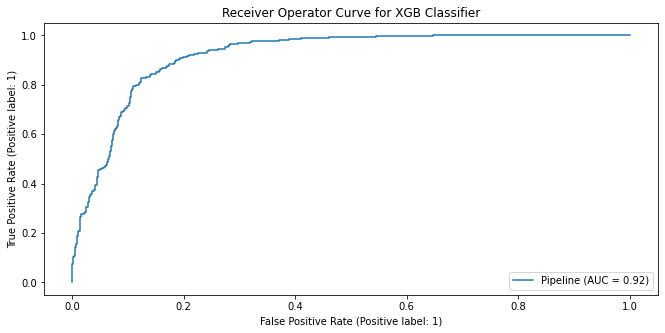

{'f1_score': 0.8741496598639455, 'accuracy': 0.852}

In [79]:
from trainer_lib.modelling.train import Evaluation, Explain
evaluate = Evaluation().evaluate(trainer.best_classifier, X_test, y_test)
p, metrics = evaluate
metrics

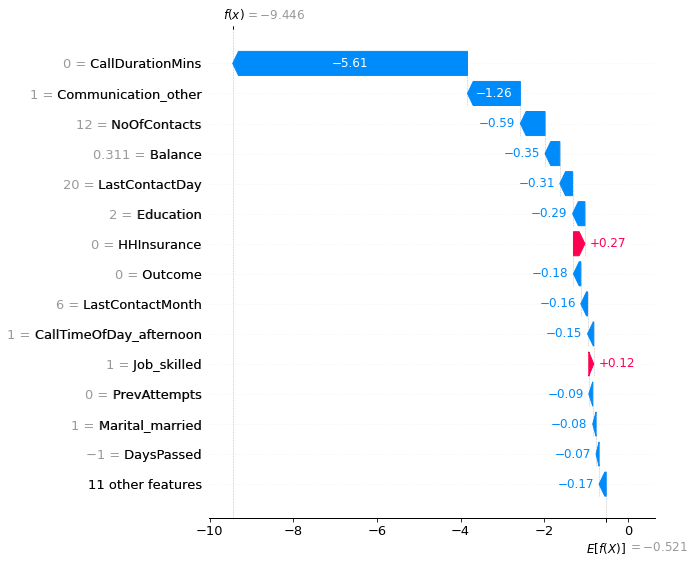

In [80]:
explain = Explain(trainer.best_classifier, X_test)
explain.waterfall()